# Brief 5 - Analyse

In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'Ressources\CURATED\data.csv', dtype={'id_prod':'string',
                                                        'date':'string',
                                                        'session_id':'string',
                                                        'client_id':'string',
                                                        'sex':'string',
                                                        'birth':'int64',
                                                        'price':'float64',
                                                        'categ':'float64'})
df.sample(5)

,id_prod,date,session_id,client_id,sex,birth,price,categ
333270,1_670,2021-10-01 23:05:14.210154,s_98654,c_5240,f,1952,29.55,1.0
89944,0_1696,2021-12-09 16:29:08.227291,s_131876,c_5798,m,1978,8.46,0.0
198582,0_1254,2021-10-10 13:40:35.438057,s_102786,c_1060,f,1973,5.22,0.0
57164,1_374,2021-09-23 00:54:03.447171,s_93998,c_8604,m,1950,10.71,1.0
108942,0_2223,2021-12-06 04:12:38.408179,s_130110,c_4820,m,1974,4.99,0.0


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313552 entries, 0 to 337014
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     313552 non-null  string        
 1   date        313552 non-null  datetime64[ns]
 2   session_id  313552 non-null  string        
 3   client_id   313552 non-null  string        
 4   sex         313552 non-null  string        
 5   birth       313552 non-null  int64         
 6   price       313552 non-null  float64       
 7   categ       313552 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 21.5 MB


In [4]:
df['age'] = int(datetime.datetime.today().strftime('%Y')) - df['birth']

## Parité :

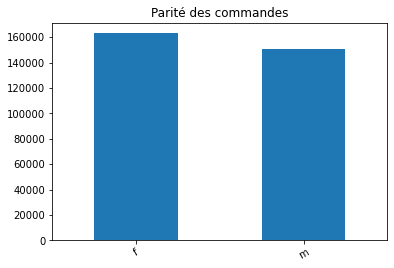

In [5]:
df['sex'].value_counts().plot(kind='bar', title='Parité des commandes', rot=30)
plt.savefig('Ressources/graphs/parite.png', dpi=200)

## Analyse Categ :

Je cherche a savoir a quoi correspond les différentes catégories de produits (0, 1 et 2).

In [6]:
df[df['categ']==0].describe()

,birth,price,categ,age
count,195171.000000,195171.000000,195171.0,195171.000000
mean,1978.200424,10.645050,0.0,42.799576
std,11.512656,4.928149,0.0,11.512656
min,1929.000000,0.620000,0.0,17.000000
25%,1974.000000,6.300000,0.0,35.000000
50%,1980.000000,9.990000,0.0,41.000000
75%,1986.000000,14.450000,0.0,47.000000
max,2004.000000,40.990000,0.0,92.000000


In [7]:
df[df['categ']==1].describe()

,birth,price,categ,age
count,102625.000000,102625.000000,102625.0,102625.000000
mean,1974.186144,20.478298,1.0,46.813856
std,15.802644,7.571942,0.0,15.802644
min,1929.000000,2.000000,1.0,17.000000
25%,1963.000000,15.810000,1.0,35.000000
50%,1975.000000,19.080000,1.0,46.000000
75%,1986.000000,24.980000,1.0,58.000000
max,2004.000000,80.990000,1.0,92.000000


In [8]:
df[df['categ']==2].describe()

,birth,price,categ,age
count,15756.000000,15756.000000,15756.0,15756.000000
mean,1996.248794,75.113138,2.0,24.751206
std,9.632349,39.140493,0.0,9.632349
min,1930.000000,30.990000,2.0,17.000000
25%,1994.000000,53.990000,2.0,19.000000
50%,1998.000000,62.540000,2.0,23.000000
75%,2002.000000,69.990000,2.0,27.000000
max,2004.000000,300.000000,2.0,91.000000


Il en ressort que les catégories correspondent à des tranches de prix qui se superpose légèrement.

 - Categ 0 = 0.62 - 40.99
 - Categ 1 = 2.00 - 80.99
 - Categ 2 = 30.99 - 300.00

## Prix :

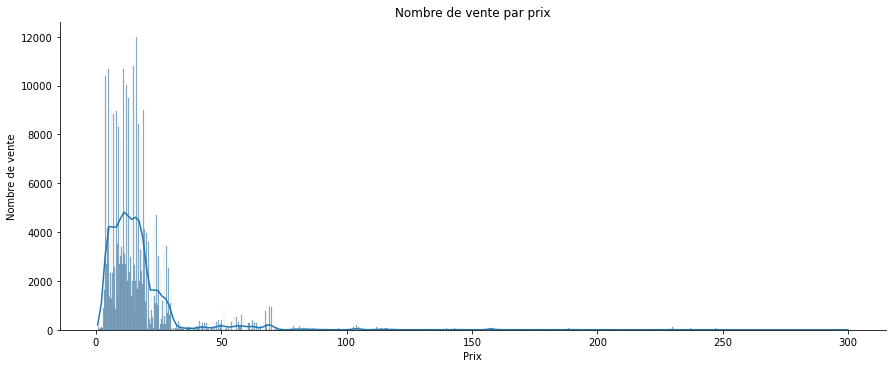

In [9]:
ax = sns.displot(df, x='price',kde=True, height=5, aspect=2.5)
ax.set(title='Nombre de vente par prix', 
       xlabel='Prix', 
       ylabel='Nombre de vente')
plt.savefig('Ressources/graphs/sales_by_price.png', dpi=200)

La majeur partie des ventes sont faites sur des articles valant entre 5 et 30 euros.

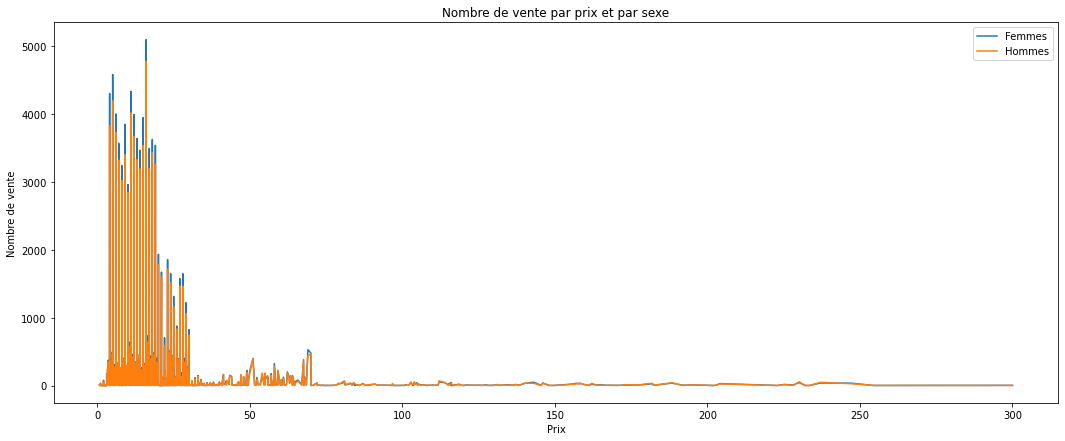

In [10]:
plt.figure(figsize=(18, 7))
df[df['sex']=='f'].groupby('price')['id_prod'].count().plot()
df[df['sex']=='m'].groupby('price')['id_prod'].count().plot(xlabel='Prix', 
                                                            ylabel='Nombre de vente', 
                                                            title='Nombre de vente par prix et par sexe')
plt.legend(['Femmes','Hommes'])
plt.savefig('Ressources/graphs/sales_by_price_&_sex.png', dpi=200)

On peut remarquer par ce graphique que les hommes font exactement les mêmes dépenses que les femmes mais dans une proportion légèrement moindre.

## Age : 

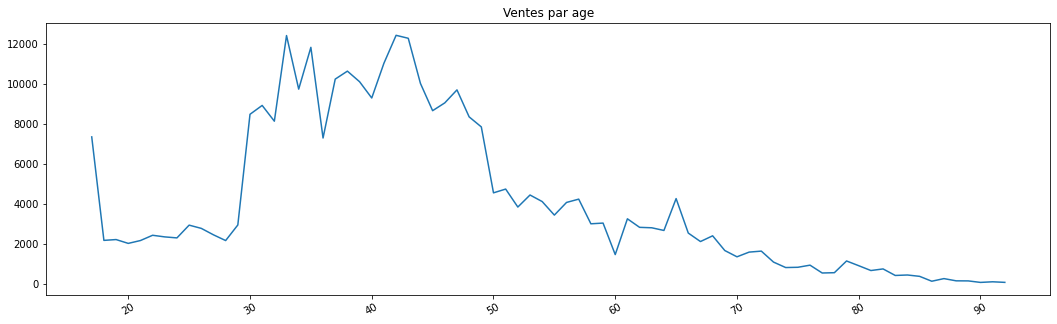

In [11]:
plt.figure(figsize=(18, 5))
df['age'].value_counts().sort_index().plot(title='Ventes par age', rot=30)
plt.savefig('Ressources/graphs/by_age.png', dpi=200)

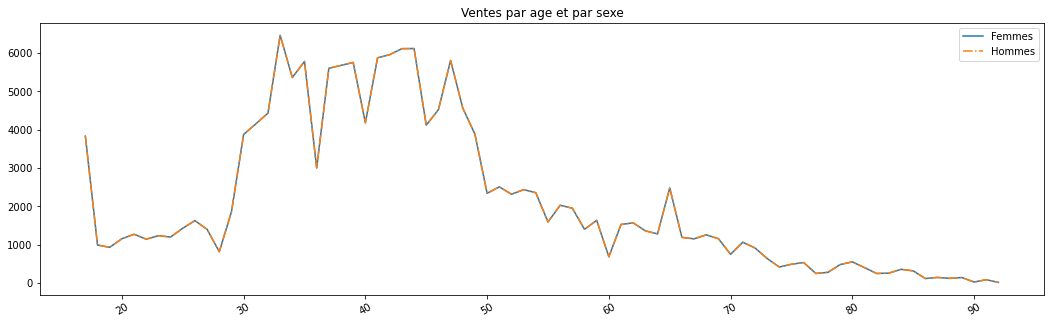

In [12]:
plt.figure(figsize=(18, 5))
df['age'][df['sex']=='f'].value_counts().sort_index().plot()
df['age'][df['sex']=='f'].value_counts().sort_index().plot(title='Ventes par age et par sexe', rot=30, linestyle='-.')
plt.legend(['Femmes','Hommes'])
plt.savefig('Ressources/graphs/by_age_&_sex.png', dpi=200)

Une superposition parfaite des courbes de ventes par sexe.

## Time series : 

In [13]:
df['by_year'] = df['date'].dt.year
df['by_month'] = df['date'].dt.strftime('%Y-%m')
df['by_day'] = df['date'].dt.strftime('%Y-%m-%d')
df['by_hour'] = df['date'].dt.hour
df.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,age,by_year,by_month,by_day,by_hour
112824,0_1574,2021-10-15 14:55:48.879282,s_105185,c_6981,f,1974,9.67,0.0,47,2021,2021-10,2021-10-15,14
271143,0_1493,2022-01-18 10:24:34.427545,s_151595,c_4161,m,1979,14.99,0.0,42,2022,2022-01,2022-01-18,10
216476,0_257,2021-04-07 07:57:49.075911,s_17165,c_4609,f,1990,15.99,0.0,31,2021,2021-04,2021-04-07,7


#### Ventes par années :

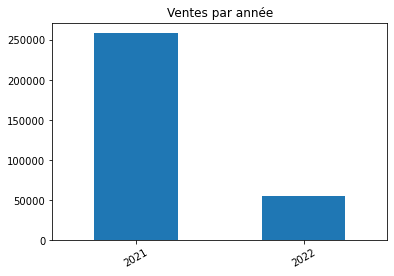

In [14]:
df['by_year'].value_counts().plot(kind='bar', title='Ventes par année', rot=30)

'''by_year = df.groupby('by_year').agg(Vente =('by_year','count'))
by_year.plot(kind='bar', 
             title = 'Ventes par année', 
             xlabel='',
             cmap='Dark2', rot = 30)'''

plt.savefig('Ressources/graphs/by_year.png', dpi=200)

Une année de vente en 2022 ?

#### Ventes par mois : 

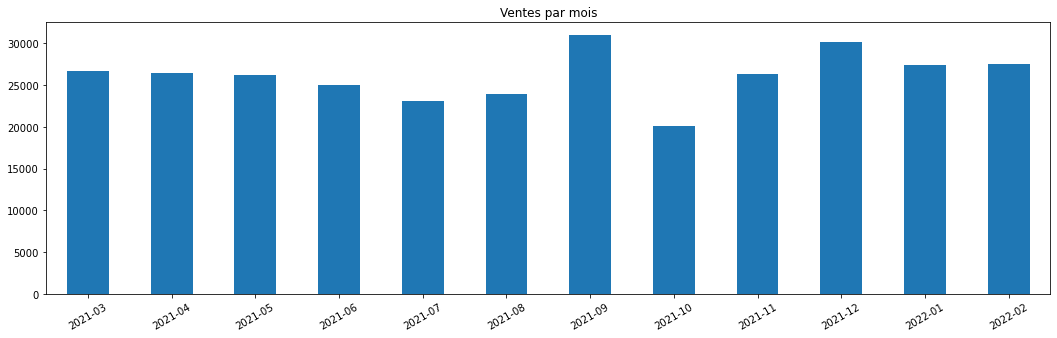

In [15]:
plt.figure(figsize=(18, 5))
df['by_month'].value_counts().sort_index().plot(kind='bar', title='Ventes par mois', rot=30)

'''by_month = df.groupby('by_month').agg(Vente =('by_month','count'))
by_month.plot(kind='bar', 
              title = 'Vente par mois', 
              cmap='Dark2', 
              xlabel='',
              rot = 30)'''

plt.savefig('Ressources/graphs/by_month(bar).png', dpi=200)

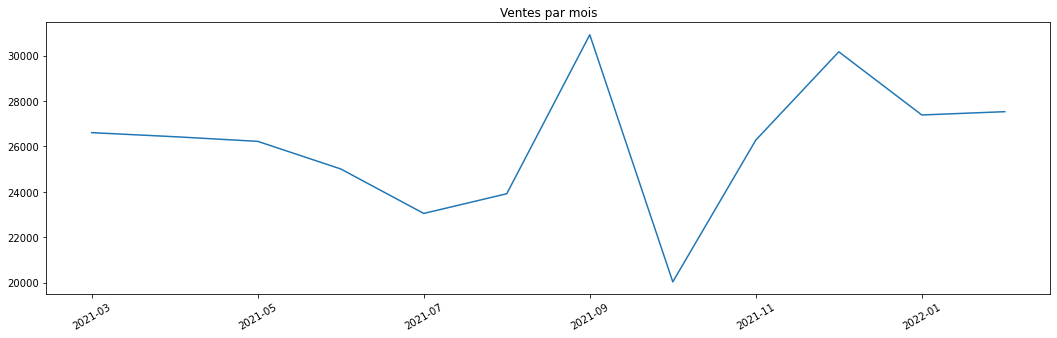

In [16]:
plt.figure(figsize=(18, 5))
df['by_month'].value_counts().sort_index().plot(title='Ventes par mois', rot=30)
plt.savefig('Ressources/graphs/by_month(line).png', dpi=200)

Une hausse des ventes sur le mois de septembre et une forte baisse sur le mois de octobre.

#### Ventes par jours : 

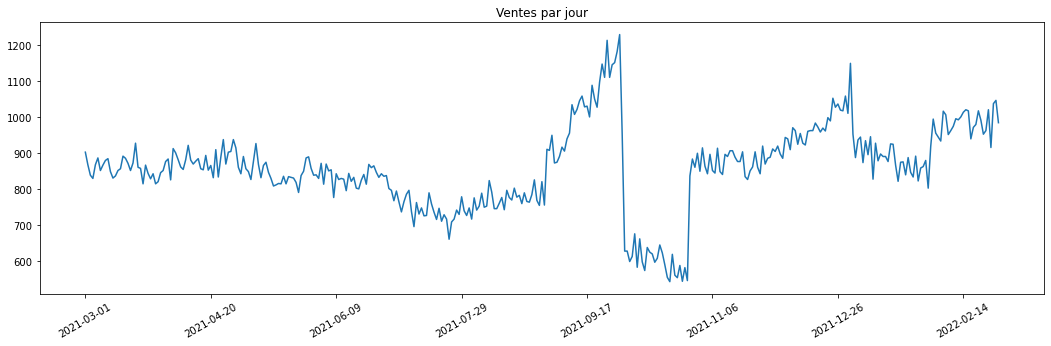

In [17]:
plt.figure(figsize=(18, 5))
df['by_day'].value_counts().sort_index().plot(title='Ventes par jour', rot=30)

'''by_day = df.groupby('by_day').agg(Vente =('by_day','count'))
by_day.plot(title = 'Ventes par jour', 
            cmap='Dark2', 
            xlabel='',
            rot = 30)'''

plt.savefig('Ressources/graphs/by_day.png', dpi=200)

On retrouve le defaut sur le mois de octobre.

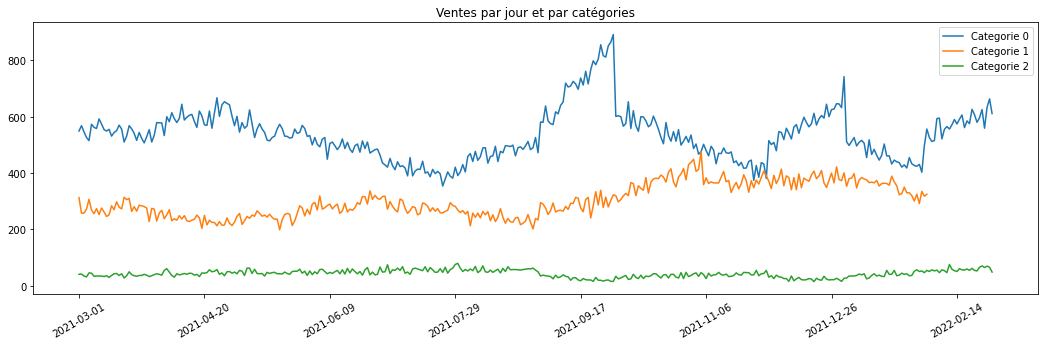

In [18]:
plt.figure(figsize=(18, 5))
df['by_day'][df['categ']==df['categ'].unique()[0]].value_counts().sort_index().plot()
df['by_day'][df['categ']==df['categ'].unique()[2]].value_counts().sort_index().plot()
df['by_day'][df['categ']==df['categ'].unique()[1]].value_counts().sort_index().plot(title='Ventes par jour et par catégories', rot=30)
plt.legend(['Categorie 0','Categorie 1','Categorie 2'])
plt.savefig('Ressources/graphs/by_day_&_cat.png', dpi=200)

#### Par heures :

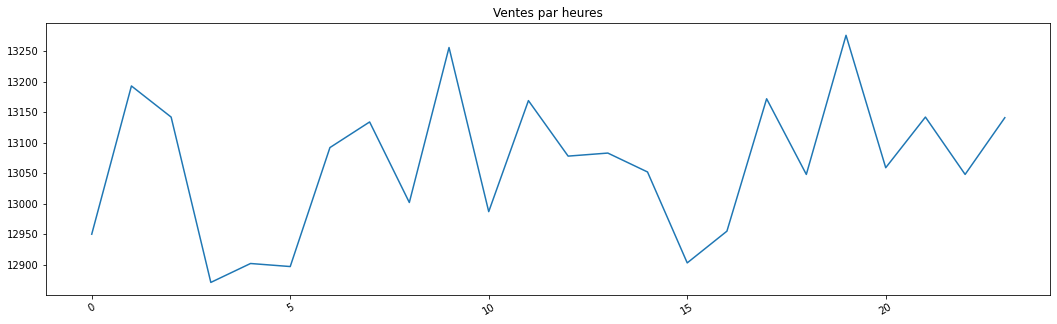

In [19]:
plt.figure(figsize=(18, 5))
df['by_hour'].value_counts().sort_index().plot(title='Ventes par heures', rot=30)
plt.savefig('Ressources/graphs/by_hour.png', dpi=200)

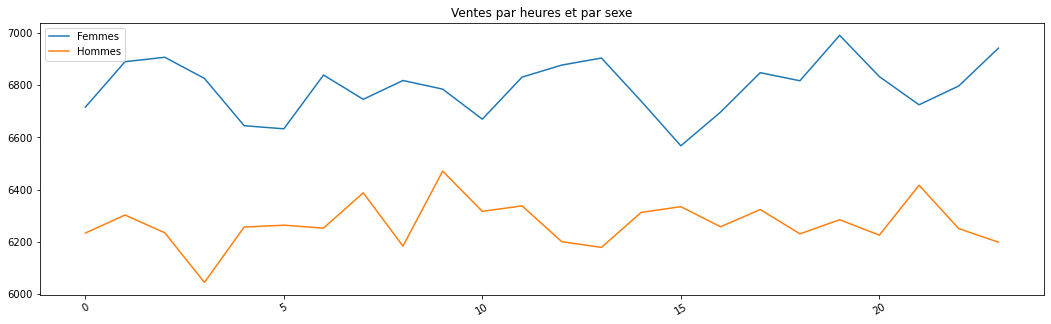

In [20]:
plt.figure(figsize=(18, 5))
df['by_hour'][df['sex']=='f'].value_counts().sort_index().plot()
df['by_hour'][df['sex']=='m'].value_counts().sort_index().plot(title='Ventes par heures et par sexe', rot=30)
plt.legend(['Femmes','Hommes'])
plt.savefig('Ressources/graphs/by_hour_&_sex.png', dpi=200)

## Indicateur de tendance centrale : 


la repartition du price est :

mod:  0    15.99
dtype: float64
moy:  17.102978006907307
med:  13.83
var:  309.6479513678424
std:  17.596816512308195
skw:  5.541002450402671
kur:  46.655005197796555


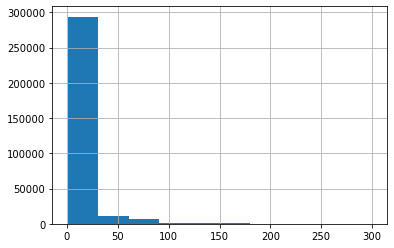


la repartition du age est :

mod:  0    42
dtype: int64
moy:  43.20651120069398
med:  42.0
var:  190.37265265949313
std:  13.797559663197443
skw:  0.6022869363439257
kur:  0.3663229459337156


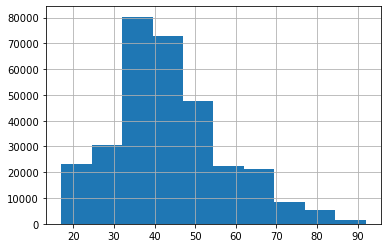

<Figure size 432x288 with 0 Axes>

In [21]:
for col_name in ['price','age']:
    print(f'\nla repartition du {col_name} est :\n')
    print("mod: ",df[f'{col_name}'].mode())
    print("moy: ",df[f'{col_name}'].mean())
    print("med: ",df[f'{col_name}'].median())
    print("var: ",df[f'{col_name}'].var(ddof=0))
    print("std: ",df[f'{col_name}'].std(ddof=0))
    print("skw: ",df[f'{col_name}'].skew())
    print("kur: ",df[f'{col_name}'].kurtosis())
    df[f'{col_name}'].hist()
    plt.show()
    plt.savefig(f'Ressources/graphs/{col_name}_tendance.png', dpi=200)

## Lorenz et Gini :

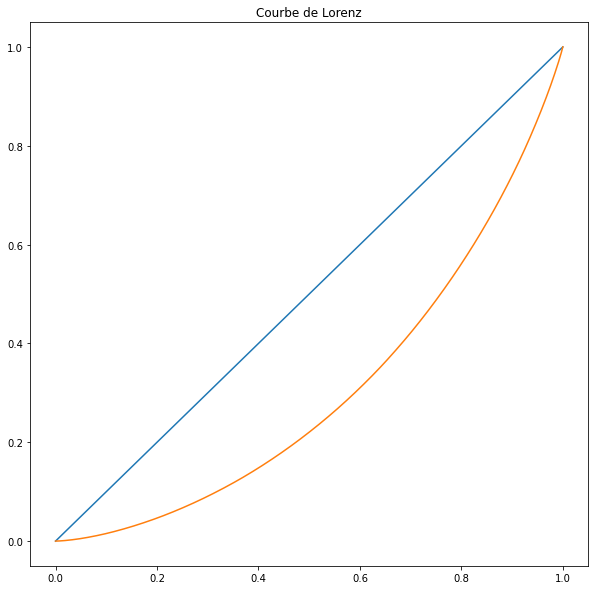

l'indice de Gini est : 0.39500769791665813


<Figure size 432x288 with 0 Axes>

In [22]:
#  On traite ici les dépenses totales des clients sur la periode (une année):
df_lorenz = df.groupby('client_id')['price'].sum()
lorenz = np.cumsum(np.sort(df_lorenz)) / np.sum(df_lorenz)
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
n = len(lorenz)
index = np.arange(n)/n
AUC = lorenz.sum()/n # Surface sous la courbe de Lorenz.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

plt.figure(figsize=(10, 10))
plt.plot(index , index)
plt.plot(index , lorenz )
plt.title('Courbe de Lorenz')
plt.show()
plt.savefig('Ressources/graphs/lorenz_courbe.png', dpi=200)

print("l'indice de Gini est :", gini)

## Correlations : 

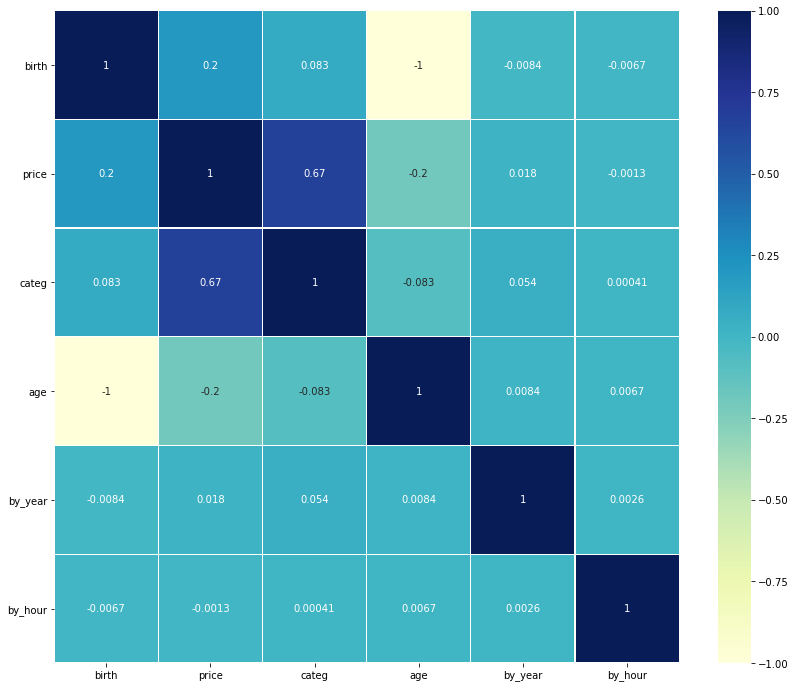

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.savefig('Ressources/graphs/correlation.png', dpi=200)

#### Sexe / Catégories :

In [24]:
sex_categ = df.pivot_table('price',index =['sex'], columns=['categ'], aggfunc='size')
sex_categ

categ,0.0,1.0,2.0
sex,,,
f,101148,53774,8122
m,94023,48851,7634


In [25]:
X2 = stats.chi2_contingency(sex_categ, correction=False)
print(f'Chi² : {X2[0]} (Chi² théorique : 5.99)\nP-Value : {X2[1]}')

Chi² : 10.202417277273174 (Chi² théorique : 5.99)
P-Value : 0.0060893822533516695


L'hypothèse d'indépendance est fausse.

#### Age / Total achat :

#### Age / Fréquence achat :

#### Age / Taille panier : 

#### Age / Catégories :